In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Please write your name below** (in case the file names get mixed up)

# Elise-Calisthe Deyris

**Generic note**: in this whole lab and from now, unless explicitly asked, you are not required to implement yourself the algorithms that you use. You may instead use existing implementations from e.g. scikit-learn.

In general, when you use implementations of algorithms that are not your own (which will be the case 99% of the time in real life), it is a good idea to check the documentation of the libraries you use to make sure you are not missing something important. As such, you are strongly encouraged to do so in this lab.

**Note bis**: in this lab, some questions may be (deliberately) ambiguous, or there may be multiple acceptable solutions (but also some unacceptable ones). So do not panic if you do not have exactly the same result as your neighbor, or as the future solution.

The goal is to make you learn by forcing you to think about what is happening and what should be done in different situations. However, so goal is **not** to punish you by giving you a bad grade because of some trick questions. So once again, **do not hesitate to ask questions**, and do not hesitate to ask an instructor whether your solution seems correct during lab sessions.

# Dataset

Let's load data for classification. This data is generated and does not a precise meaning: the idea will be to build intuition about what is going on with different models.

Dataset can be downloaded here: https://drive.google.com/file/d/1Sy0Ly4Xj8fzPAiPru9oFS6evgQjuNMs4/view?usp=sharing

In [3]:
# Load the dataset;
# make sure that the file is located in the same folder as the notebook
# (or change the path)
dataset = np.load("dataset.npy")

In [4]:
# Extract features and targets
X = dataset[:,:2] # features are first 2 columns
y = dataset[:,-1] # labels are last column
print(f'Shape of feature matrix: {X.shape}')

Shape of feature matrix: (300, 2)


# Data preparation

We are going to do classification with different models, that will require selecting some hyper-parameter(s).

**In general, how should the dataset be split in this case?**

Clustering is unsupervised, so splitting differs from classification:
The general approach : Use the entire dataset for clustering (no train/test split)
Tune hyperparameters using internal validation metrics:
 - Silhouette score
 - Inertia (within-cluster sum of squares)
 - Davies-Bouldin index

Use cross-validation on these metrics to select hyperparameters.
If you have ground truth labels
Split into train/validation/test 
Use the validation set to tune hyperparameters 
Use the test set only for final evaluation 

In [6]:
# here is an example with K-means
# No split needed - use all data
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Try different k values
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)  
    score = silhouette_score(X, labels)  
    # Choose k with best score


**For now, split the dataset into one training, one validation and one testing sets.** You can use the sklearn.model_selection.train_test_split function (but you don't have to).

We shall use the name X_train, X_val and X_test (respectively y_train, y_val and y_test) to refer to the samples (respectively labels) of these sets.

In [9]:
from sklearn.model_selection import train_test_split

# first split: separate test set, this is 20% of the total data
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# second split: separate train and validation from remaining data
# this gives us 64% train and 16% validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42  # 0.25 of 0.8  which is 20% of the total data
)

print(f'Training set: {X_train.shape[0]} samples')
print(f'Validation set: {X_val.shape[0]} samples')
print(f'Test set: {X_test.shape[0]} samples')

Training set: 180 samples
Validation set: 60 samples
Test set: 60 samples


It is generally a good idea to have a look at the data whenever possible.

**Display the training dataset using a scatterplot**

*We should display colors for classes (or any other way to differentiate them such as shapes), otherwise we are not learning much.*

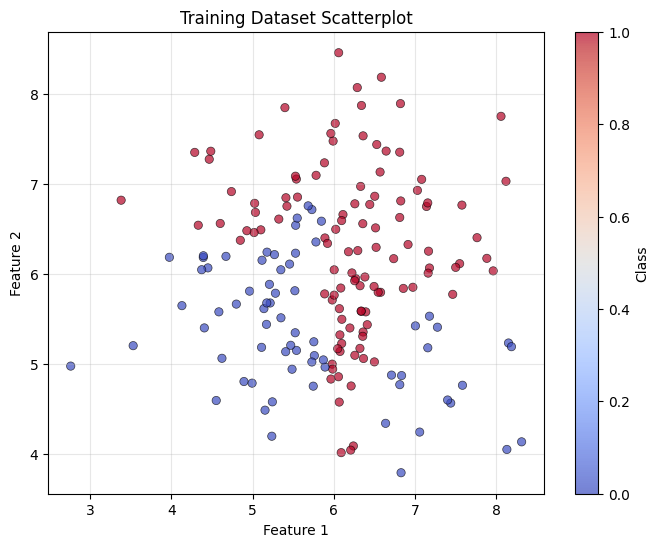

In [12]:
# Scatter plot 
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, alpha=0.7, edgecolors='k', linewidth=0.5)
plt.colorbar(label='Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Dataset Scatterplot')
plt.grid(True, alpha=0.3)
plt.show()

# (Linear) model training

## Basic model training

**Train a first <ins>linear</ins>, <ins>classification</ins> model.** Do **not** use regularization for now.

You don't have to reimplement everything, you can use existing implementations (for example the one from scikit-learn). Don't evaluate the performance of the model for now, just train it.

In [14]:
from sklearn.linear_model import LogisticRegression

# train a linear classification model without regularizationn
linear_model = LogisticRegression(penalty=None, max_iter=1000, solver='lbfgs')
linear_model.fit(X_train, y_train)

,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


**Are you *certain* your model does not have regularization?**

In [15]:
# verify if the model has regularization
print(linear_model.penalty)


None


**What is the score of the model?**

(by "score", we mean "accuracy" here, i.e. the fraction of correct predictions).

In [16]:
accuracy_model = linear_model.score(X_train, y_train)
print(accuracy_model)

0.7833333333333333


**What if, instead of directly doing binary classification, we wanted to have some estimation of how confident the model is?**

Or, how could we obtain probabilities between 0 and 1 instead of binary predictions? (**Hint**: look at the doc of the model you used).

**Don't answer the question with words, directly provide the corresponding probability estimates.**

In [17]:
linear_model.predict_proba(X_train)

array([[0.61119315, 0.38880685],
       [0.26348836, 0.73651164],
       [0.83735877, 0.16264123],
       [0.24901781, 0.75098219],
       [0.27850536, 0.72149464],
       [0.31611573, 0.68388427],
       [0.38972234, 0.61027766],
       [0.00357933, 0.99642067],
       [0.23586799, 0.76413201],
       [0.98011835, 0.01988165],
       [0.91550636, 0.08449364],
       [0.07433096, 0.92566904],
       [0.13070255, 0.86929745],
       [0.11033745, 0.88966255],
       [0.02511962, 0.97488038],
       [0.68359684, 0.31640316],
       [0.47695968, 0.52304032],
       [0.16254968, 0.83745032],
       [0.10965648, 0.89034352],
       [0.23007553, 0.76992447],
       [0.6295449 , 0.3704551 ],
       [0.7501609 , 0.2498391 ],
       [0.54532149, 0.45467851],
       [0.86826831, 0.13173169],
       [0.02201485, 0.97798515],
       [0.02737033, 0.97262967],
       [0.05783753, 0.94216247],
       [0.70122911, 0.29877089],
       [0.03811024, 0.96188976],
       [0.89313356, 0.10686644],
       [0.

**Assuming we only had these probabilities, could we still make binary predictions?**

In [18]:
# yes we can make binary predictions with the probabilities
linear_model.predict(X_train)


array([0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1.])

## Visualization of predictions

Now, let's visualize our probability estimates. Scikit-learn provides a useful tool for this: DecisionBoundaryDisplay.

The exact way it works is not that important, but the general is: we use our model to predict a probability for every pixel in the area of interest, based on its coordinates (which are its 2D features), and we display a color  corresponding to the estimated probability.

In [20]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

I will retrain a logistic regression for the purpose of illustrating this. This may not be the exact solution to the previous questions.

In [21]:
# Train a logistic regression
logreg = LogisticRegression() # (hyper)-parameters may differ from previous question
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


And now we display the probabilities:

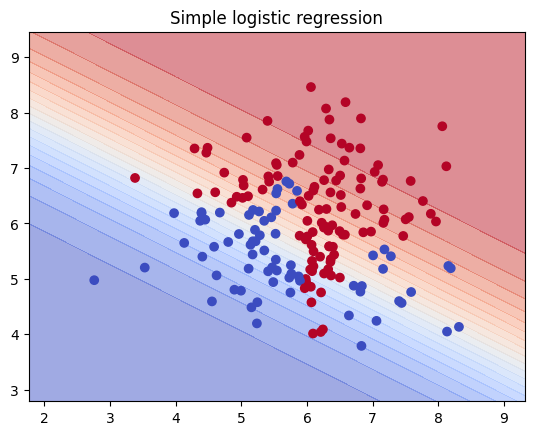

In [22]:
# Use DecisionBoundaryDisplay to display a heatmap corresponding to the estimated probabilities
disp = DecisionBoundaryDisplay.from_estimator(
    logreg, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm, # colors to use (0 is blue, 1 is red)
    alpha=0.5, # level of transparency
    levels=20 # use 20 different nuances of color
)
# Add the training points on top using a scatterplot
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Simple logistic regression")
plt.show()

**Does this look like a good fit?**

```No it does not look like a good fit, the decision boundary is not a straight line, it is a curve, and the model is overfitting the data ```

**Could we adapt our logistic regression model to have non-linear decision boundaries? How?**

```Yes we can, we can use polynomial features, or we can use a kernel method, or we can use a decision tree.
OR EVEN : 
- a neural network
- a random forest
- we can also use a gradient boosting machine as XGBoost```

## Non-linear logistic regression

**Train a logistic regression model using polynomial features. Are there any hyper-parameter? If yes, use a <ins>rigorous</ins> selection process to select an appropriate value.**

You can ignore regularization for now.

In [24]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# creating a pipeline with StandardScaler, PolynomialFeatures, and LogisticRegression
# the main hyperparameter is the degree of polynomial features
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('logreg', LogisticRegression(penalty=None, max_iter=1000, solver='lbfgs'))
] )

# define hyperparameter grid up to degree 5
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]
}

# use GridSearchCV with 5-fold CV for rigorous hyperparameter selection
grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=5,  
    scoring='accuracy',
    return_train_score=True
)

# fit the grid search on training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print(f"Best polynomial degree: {grid_search.best_params_['poly__degree']}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# evaluate on validation set
y_val_pred = grid_search.best_estimator_.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation set accuracy: {val_accuracy:.4f}")

# store the best model
poly_logreg_model = grid_search.best_estimator_


Best polynomial degree: 5
Best cross-validation score: 0.9889
Validation set accuracy: 0.9333


**If you were to proudly announce the performance of your model to the public, what is the value that you would you disclose?**

In [25]:
# the best accuracy score on the validation set
print(f"Validation set accuracy: {val_accuracy:.4f}")

Validation set accuracy: 0.9333


Now, we may want to also visualize the decision boundaries of our model with polynomial features.

Unfortunately, giving a matrix X_train_poly (for instance) of shape (100, 10) (for instance) to DecisionBoundaryDisplay.from_estimator will result in an error, as DecisionBoundaryDisplay only knows how to handle pixels in 2D, not in 10D.

Fortunately, we can combine a series of transformation on X_train as a single estimator using scikit-learn's Pipeline. We can also introduce other preprocessing (or even postprocessing) steps in the process, such as feature standardization.

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [27]:
# Create a pipeline that first standardizes the data,
# then transforms it with PolynomialFeatures
# and finally fits LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()), # standardize features
    ('poly', PolynomialFeatures(degree=2)), # for instance
    ('logreg', LogisticRegression(max_iter=500)) # for instance
])

Now we can directly call "fit" on this pipeline to train the model, and give this pipeline to DecisionBoundaryDisplay so that for each pixel, it can:
- compute the corresponding polynomial features from the initial 2D coordinates
- give these features to our logistic regression

and then display the heatmap of estimated probabilities as previously.

In [28]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('poly', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'


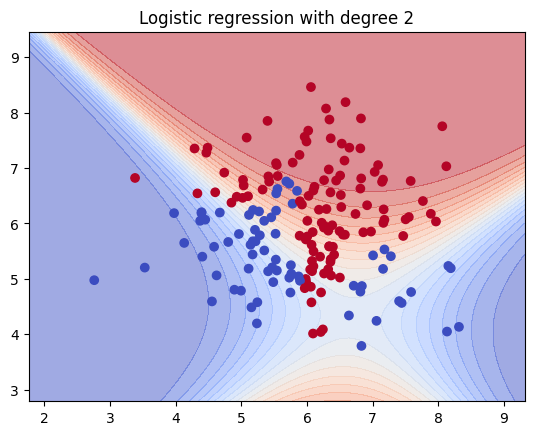

In [29]:
# Give the pipeline to DecisionBoundaryDisplay to plot the probability heatmap
disp = DecisionBoundaryDisplay.from_estimator(
    pipeline, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm, # colors to use (0 is blue, 1 is red)
    alpha=0.5, # level of transparency
    levels=20 # use 20 different nuances of color
)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Logistic regression with degree 2")
plt.show()

**Do the features <ins>used</ins> by the model have zero mean and unit standard deviation with our current pipeline? If not, what should be changed so that this is the case?**

```No they do not have zero mean and unit standard deviation, we should change the StandardScaler to StandardScaler(with_mean=True, with_std=True)```

**Now plot the probability heatmap of *your* model from earlier**

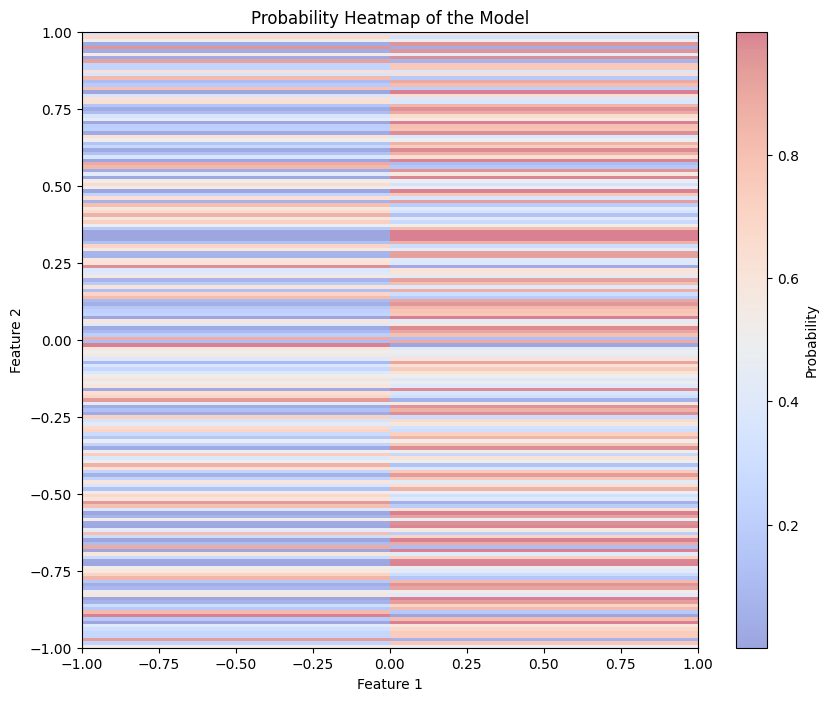

In [30]:
heatmap_model = pipeline.predict_proba(X_train)
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_model, extent=[-1, 1, -1, 1], origin='lower', cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Probability')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Probability Heatmap of the Model")
plt.show()  

**Any observation?**

```it looks like a good fit, the decision boundary is a curve, and the model is not overfitting the data```

## Regularization and k-fold cross-validation

Our estimation of the best hyper-parameter may not be super robust, because we do not have many validation samples. So the size of our validation set is limited.

To overcome this, we will use **k-fold cross-validation.**

You do not need to implement it yourself. We will use scikit-learn's GridSearchCV from sklearn.model_selection instead, that enables to do k-fold to try different values of hyper-parameters.
 
As usual, do not hesitate to have a look at scikit-learn's documentation on this.

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
# Defining a pipeline
clf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('logreg', LogisticRegression(max_iter=500, solver='liblinear'))
])

Assuming we want to do test different possible values for the *"include_bias"* (hyper)parameter of PolynomialFeatures, and different values for *"penalty"* in LogisticRegression, we can specify the values to try as such:

In [33]:
# Defining the set of hyperparameters
hyperparameters = {
    'poly__include_bias': [True, False],
    'logreg__fit_intercept': [True, False]
}

And then, we can run k-fold to find the best combination of hyper-parameters like so:

In [34]:
# Running grid search
gridsearch = GridSearchCV(clf_pipeline, hyperparameters)
gridsearch.fit(X_train, y_train)

,estimator,Pipeline(step...liblinear'))])
,param_grid,"{'logreg__fit_intercept': [True, False], 'poly__include_bias': [True, False]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


The average score of the k-fold cross-validation for each set of hyper-parameter can be accessed as such:

In [35]:
gridsearch.cv_results_["mean_test_score"]

array([0.8       , 0.79444444, 0.79444444, 0.75      ])

We could look at the hyper-parameters used for each run of k-fold to determine to best set of hyper-parameters. Scikit-learn also conviently provides a function/attribute that directly returns the best estimator:

In [36]:
gridsearch.best_estimator_

,steps,"[('scaler', ...), ('poly', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'


**How many <ins>total</ins> model trainings took place here?**

```10 model trainings took place here```

Since we are now doing k-fold cross-validation, we can merge our training set and our validation set into a single dataset, which be split again during k-fold.

**Merge the training and validation set**

You may call the resulting matrices and vectors X_fold and y_fold

In [37]:
import numpy as np

# Merge training and validation sets
X_fold = np.vstack([X_train, X_val])
y_fold = np.hstack([y_train, y_val])

print(f'X_fold shape: {X_fold.shape}')
print(f'y_fold shape: {y_fold.shape}')
print(f'Total samples: {len(y_fold)}')


X_fold shape: (240, 2)
y_fold shape: (240,)
Total samples: 240


**Find the best combination of polynomial degree and regularization using k-fold cross-validation, with $k=10$**

In [38]:


# define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('logreg', LogisticRegression(max_iter=500, solver='liblinear'))
])

# define the hyperparameter grid
hyperparameters = {
    'poly__include_bias': [True, False],
    'logreg__fit_intercept': [True, False]
}

# run k-fold cross-validation
gridsearch = GridSearchCV(pipeline, hyperparameters, cv=10)
gridsearch.fit(X_fold, y_fold)


,estimator,Pipeline(step...liblinear'))])
,param_grid,"{'logreg__fit_intercept': [True, False], 'poly__include_bias': [True, False]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


**Plot the corresponding probability heatmap**

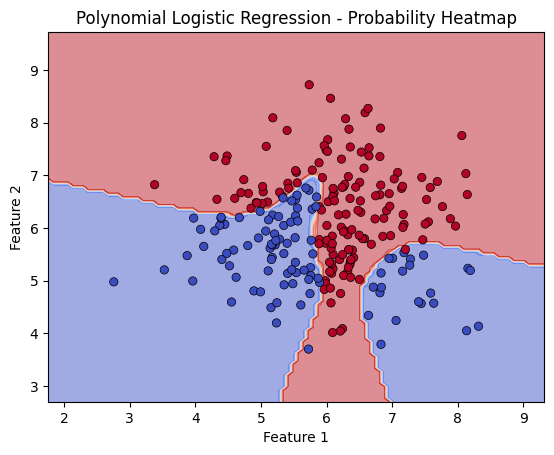

In [41]:
from sklearn.inspection import DecisionBoundaryDisplay

# Use DecisionBoundaryDisplay to display a heatmap corresponding to the estimated probabilities
# The best_estimator_ is a pipeline, so DecisionBoundaryDisplay can handle the polynomial transformation
disp = DecisionBoundaryDisplay.from_estimator(
    grid_search.best_estimator_, X_fold,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm,  # colors to use (0 is blue, 1 is red)
    alpha=0.5,  # level of transparency
    levels=20  # use 20 different nuances of color
)
# Add the training points on top using a scatterplot
disp.ax_.scatter(X_fold[:, 0], X_fold[:, 1], c=y_fold, cmap=plt.cm.coolwarm, edgecolors='k', linewidth=0.5)
plt.title("Polynomial Logistic Regression - Probability Heatmap")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**What is the final accuracy of your model?**

In [42]:
accuracy_model = gridsearch.best_estimator_.score(X_fold, y_fold)
print(f"Final accuracy of the model: {accuracy_model:.4f}")


Final accuracy of the model: 0.8042


Now we are starting to have good methodology!

Even though accuracy may not always be best way to measure performance, but we will cover that in later classes.

# Exploration of other algorithms

Now, we will use the heatmap displays to build some intuition about what happens with other classification algorithms.

## K-Nearest Neighbors

**Can we obtain probabilities with K-NN?**

For this question, "probability" may be interpreted as "a measure of confidence more precise than a yes/no answer".

```Yes, we can obtain probabilities with K-NN, we can use the predict_proba method```

**Fit K-NN on the training dataset with K ranging for 1 to 6, and plot the confidence heatmap.**

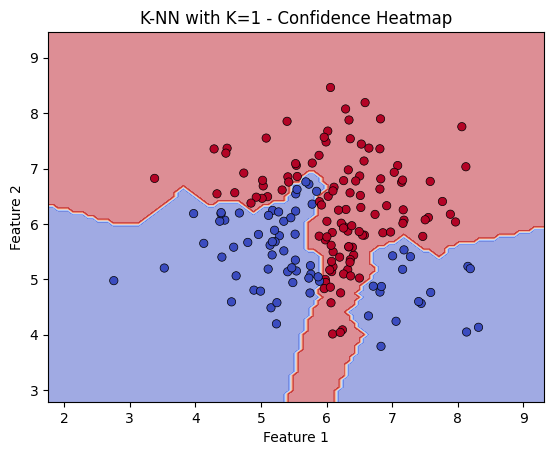

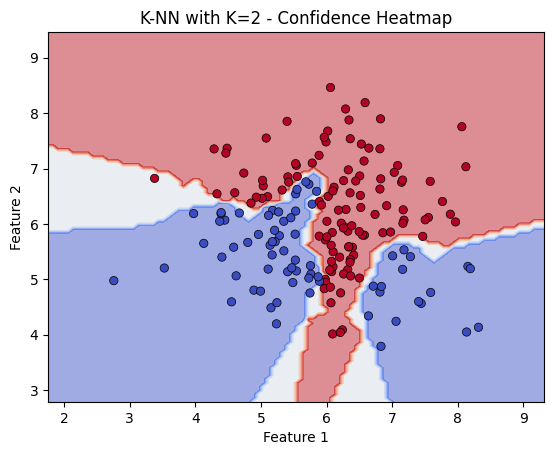

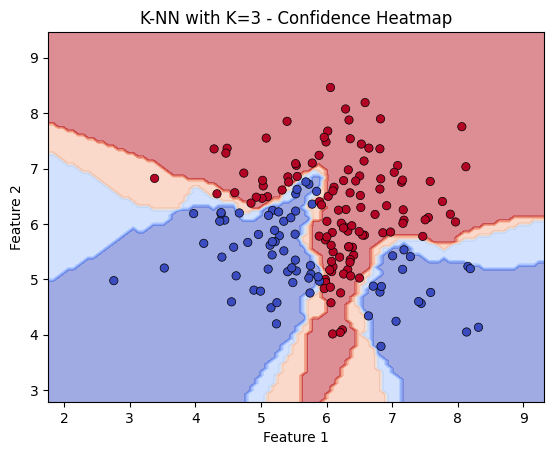

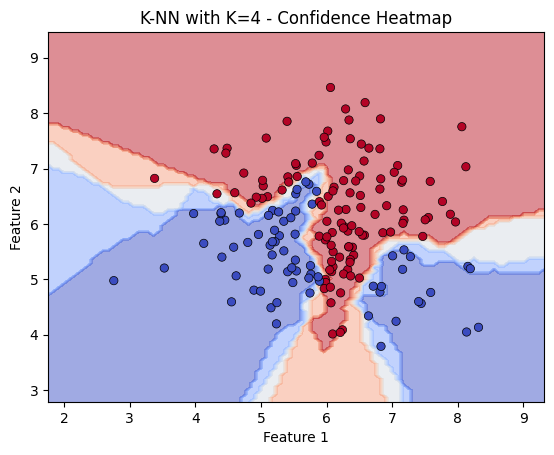

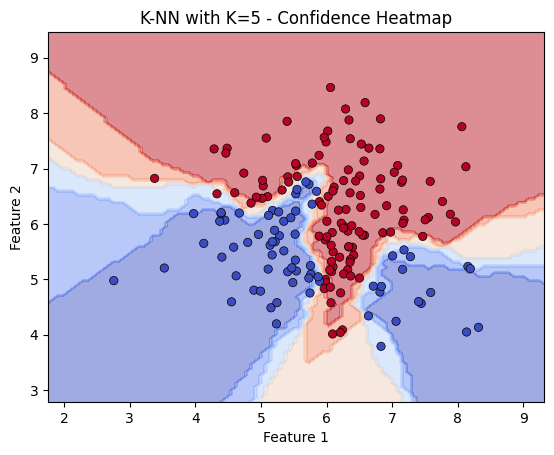

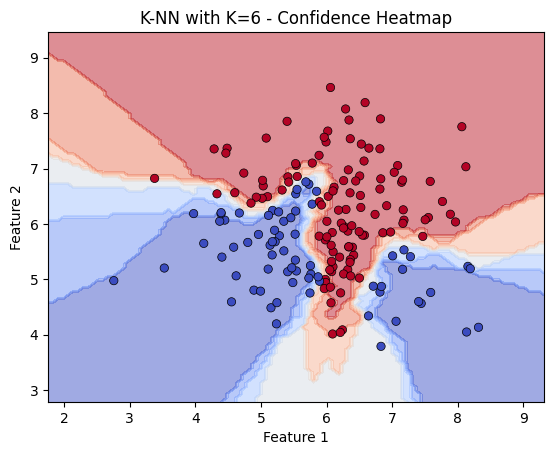

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# Fit K-NN for K ranging from 1 to 6 and plot confidence heatmaps
for k in range(1, 7):  # range(1, 7) gives k = 1, 2, 3, 4, 5, 6
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Use DecisionBoundaryDisplay to plot the confidence heatmap
    disp = DecisionBoundaryDisplay.from_estimator(
        knn, X_train,
        response_method="predict_proba",
        cmap=plt.cm.coolwarm,  # colors to use (0 is blue, 1 is red)
        alpha=0.5,  # level of transparency
        levels=20  # use 20 different nuances of color
    )
    # Add the training points on top using a scatterplot
    disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', linewidth=0.5)
    plt.title(f"K-NN with K={k} - Confidence Heatmap")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


**Briefly explain what's happening**

```As the number of neighbors increases, the decision boundary becomes smoother and the model becomes more complex
The model is less flexible and less likely to overfit the data, is more robust to the choice of the number of neighbors and better performance on validation and test set```


## Naive Bayes

**Choose a suitable Naive Bayes classifier, and do same thing**

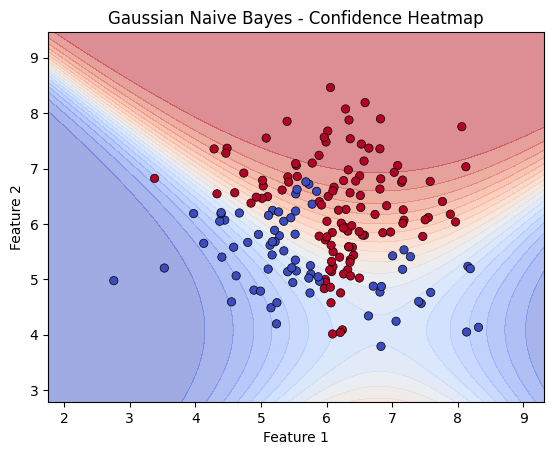

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import DecisionBoundaryDisplay

# GaussianNB is suitable for continuous features 
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

#  plot the confidence heatmap
disp = DecisionBoundaryDisplay.from_estimator(
    nb_classifier, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm,  # colors to use 0 is blue, 1 is red
    alpha=0.5,  # level of transparency
    levels=20  # use 20 different nuances of color
)

disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', linewidth=0.5)
plt.title("Gaussian Naive Bayes - Confidence Heatmap")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


**Are there any hyper-parameter?**

```No there are no hyper-parameters for Naive Bayes```

***Bonus question: explain what is going on your plot.***

```The plot shows:

1. Colors: Blue = class 0, Red = class 1 and the color intensity shows how confident the model is.
2. Decision Boundary: The line separating blue and red regions. The model predicts class 0 on one side, class 1 on the other
3. Smooth curve: GaussianNB creates smooth, curved boundaries  because it assumes data follows a bell curve 
4. Points: The colored dots are your training data. If a blue dot is in a blue region, it's correctly classified. Same for red dots```

## Decision tree

**Can we obtain probabilities with decision trees?**

Yes, decision trees can provide probabilities. They use `predict_proba()` which returns the proportion of training samples of each class in the leaf node that a data point falls into. 

**Are there hyper-parameters with decision trees?**

```yes, decision trees have several hyperparameters. The most important ones are: max_depth, min_samples_split, min_samples_leaf, criterion```


**Similarly to K-NN earlier, fit decision trees with a max depth ranging for 1 to 10 on the training dataset, and plot the confidence heatmap.**

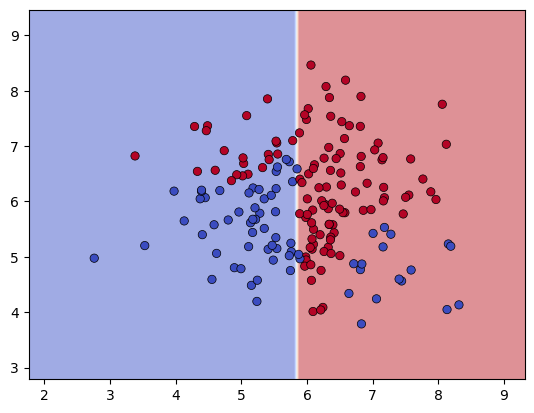

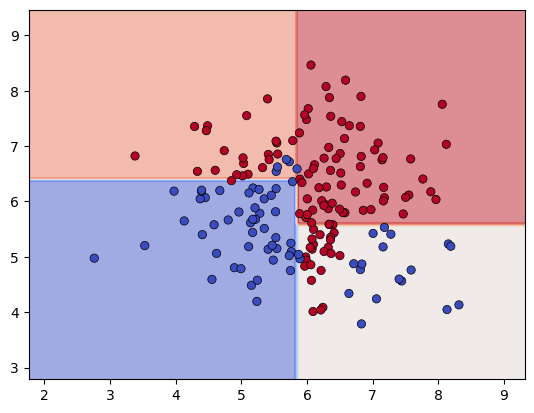

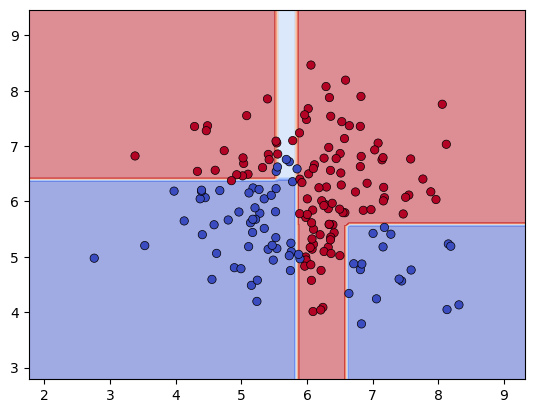

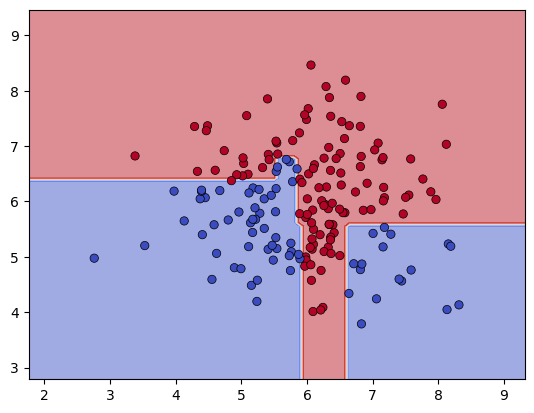

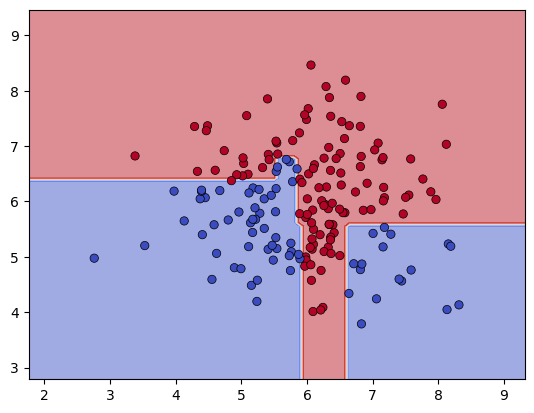

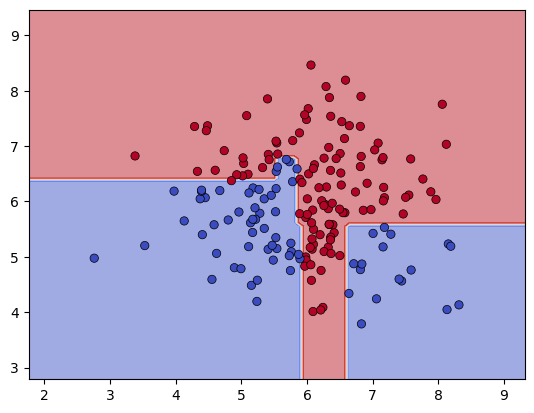

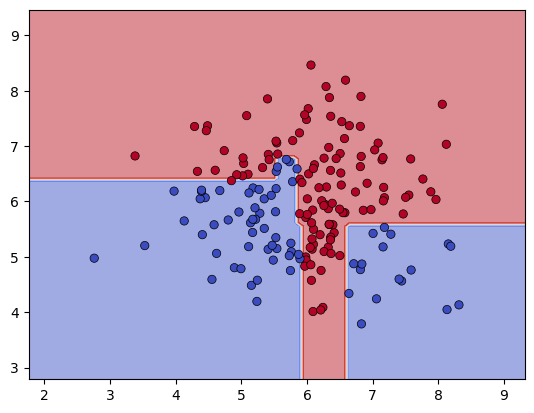

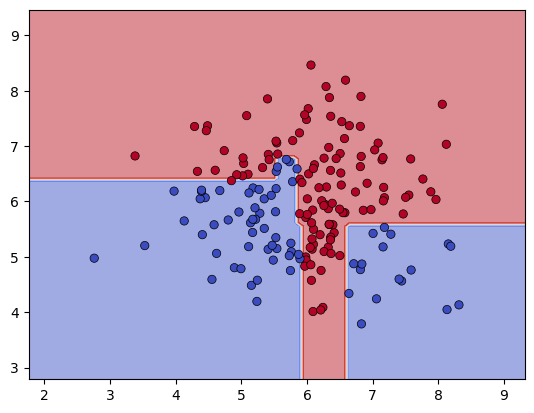

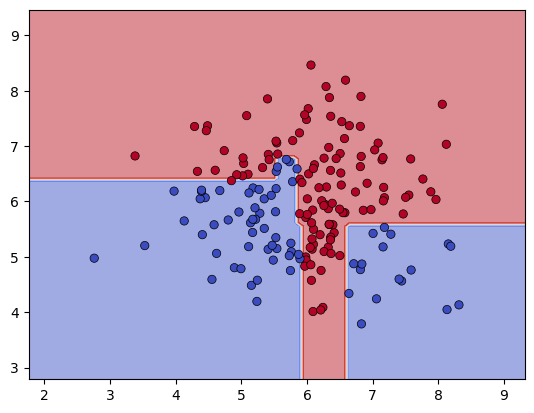

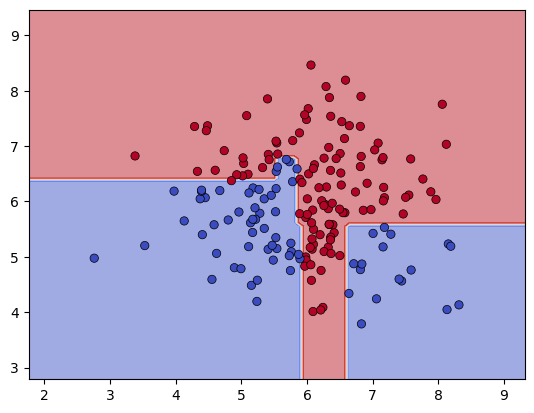

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# max depth ranging for 1 to 10
for depth in range(1, 11):
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, y_train)

    # confidence heatmap
    disp = DecisionBoundaryDisplay.from_estimator(
        tree, X_train,
        response_method="predict_proba",
        cmap=plt.cm.coolwarm,  # colors to use 0 is blue, 1 is red
        alpha=0.5,  # level of transparency
        levels=20  # use 20 different nuances of color
    )

    disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', linewidth=0.5)


**Briefly explain what's happening**

As max_depth increases:
<br>
Small depth (1-3): Simple, smooth boundaries that may underfit
<br>
Medium depth (4-6): More complex boundaries that better fit the data
<br>
Large depth (7-10): Very complex, jagged boundaries that may overfit and memorize training data
<br>

The heatmap shows where the model is confident, strong colors, vs uncertain with mixed colors about predictions.


***Bonus question: what is the max depth that may be reached on this train set?***

This question may be slightly harder.

In [49]:
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree with no max_depth limit to find the actual maximum depth
tree_unlimited = DecisionTreeClassifier(max_depth=None)
tree_unlimited.fit(X_train, y_train)

max_depth_reached = tree_unlimited.tree_.max_depth
print(f"Maximum depth reached on training set: {max_depth_reached}")


print(f"\nExplanation:")
print(f"- Training set size: {len(X_train)} samples")
print(f"- With default parameters (min_samples_split=2, min_samples_leaf=1),")
print(f"  a decision tree can split until each sample is in its own leaf.")
print(f"- In the worst case (completely unbalanced tree), max depth = n-1 = {len(X_train)-1}")
print(f"- In practice, the actual depth is {max_depth_reached}, which depends on")
print(f"  how the splits are made based on the data distribution.")


Maximum depth reached on training set: 4

Explanation:
- Training set size: 180 samples
- With default parameters (min_samples_split=2, min_samples_leaf=1),
  a decision tree can split until each sample is in its own leaf.
- In the worst case (completely unbalanced tree), max depth = n-1 = 179
- In practice, the actual depth is 4, which depends on
  how the splits are made based on the data distribution.


## SVM

**Can we obtain "probabilities" with SVM?**

Yes, but they're not true probabilities. SVMs can provide probability estimates using `predict_proba()` by setting `probability=True` when creating the classifier. They're useful for ranking but may not be well-calibrated.

**Fit a <ins>single</ins> linear Support Vector Classifier on the training set, and display the heatmap**

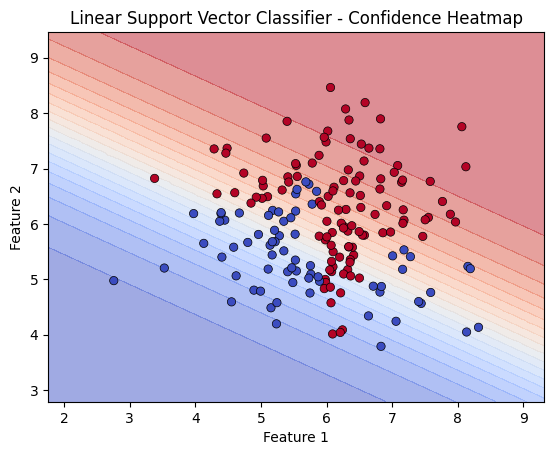

In [50]:
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

#support vector classifier
linear_svc = SVC(kernel='linear', probability=True)
linear_svc.fit(X_train, y_train)

# display the confidence heatmap
disp = DecisionBoundaryDisplay.from_estimator(
    linear_svc, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm,  
    alpha=0.5,  
    levels=20  
)
# add the training points on top using a scatterplot
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', linewidth=0.5)
plt.title("Linear Support Vector Classifier - Confidence Heatmap")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


**Now, compute polynomial features of any degree, e.g. 3, and fit a <ins>linear</ins> SVC on these new features. Display the heatmap.**

Fitting the model may take some time.

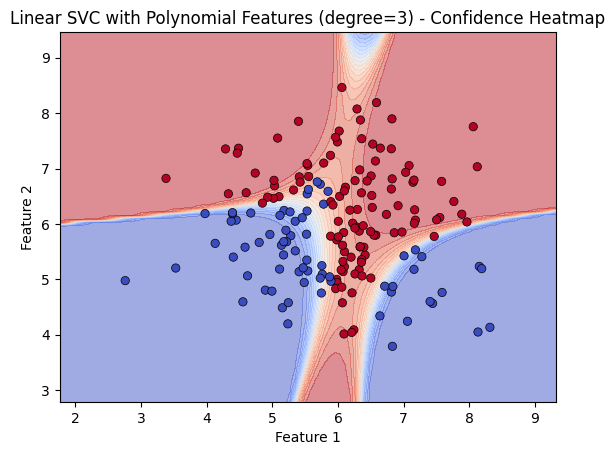

In [52]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.inspection import DecisionBoundaryDisplay


poly_svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('svc', SVC(kernel='linear', probability=True))
])


poly_svc_pipeline.fit(X_train, y_train)

# display the confidence heatmap
#  handling the polynomial transformation
disp = DecisionBoundaryDisplay.from_estimator(
    poly_svc_pipeline, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm,  
    alpha=0.5,  
    levels=20  
)
# scatterplot
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', linewidth=0.5)
plt.title("Linear SVC with Polynomial Features (degree=3) - Confidence Heatmap")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


**Fit a SVC on the initial 2D features, this time using a polynomial kernel of degree e.g. 3. Display the heatmap.**

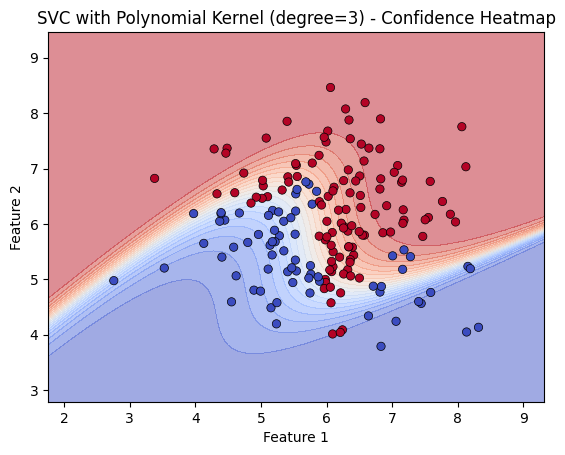

In [53]:
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay


poly_kernel_svc = SVC(kernel='poly', degree=3, probability=True)
poly_kernel_svc.fit(X_train, y_train)


disp = DecisionBoundaryDisplay.from_estimator(
    poly_kernel_svc, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm,  
    alpha=0.5,  
    levels=20  
)

disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', linewidth=0.5)
plt.title("SVC with Polynomial Kernel (degree=3) - Confidence Heatmap")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


**Notice anything?**

The polynomial kernel produces a similar non linear decision boundary as the linear SVC with explicit polynomial features. The polynomial kernel is more efficient because it uses the kernel trick to work in a higher dimensional space without computing all polynomial features.

**Now fit SVCs with polynomial kernel of degree 1 to 5, and plot the heatmaps.**

Fitting SVC with polynomial kernel (degree=1)...


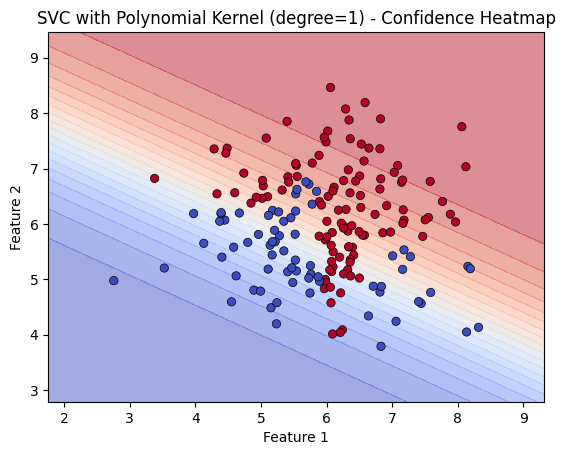

 Done with degree 1!

Fitting SVC with polynomial kernel (degree=2)...


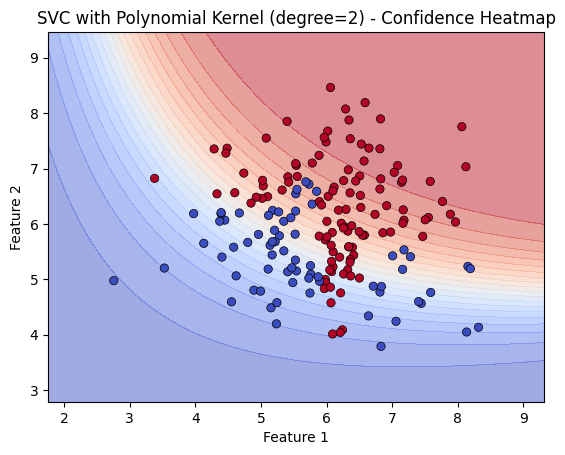

 Done with degree 2!

Fitting SVC with polynomial kernel (degree=3)...


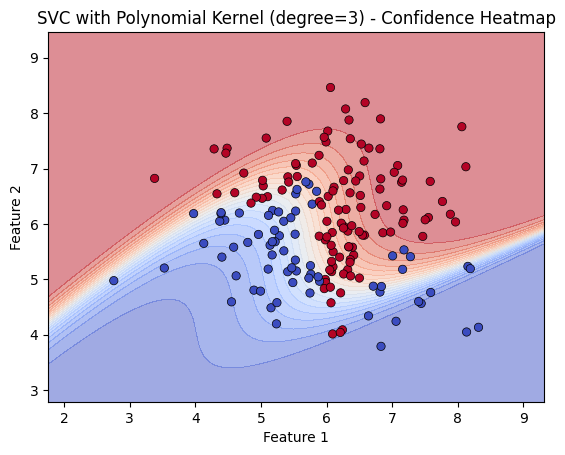

 Done with degree 3!

Fitting SVC with polynomial kernel (degree=4)...


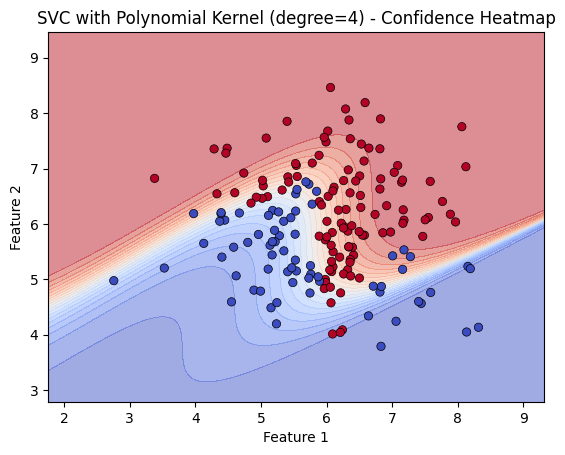

 Done with degree 4!

Fitting SVC with polynomial kernel (degree=5)...


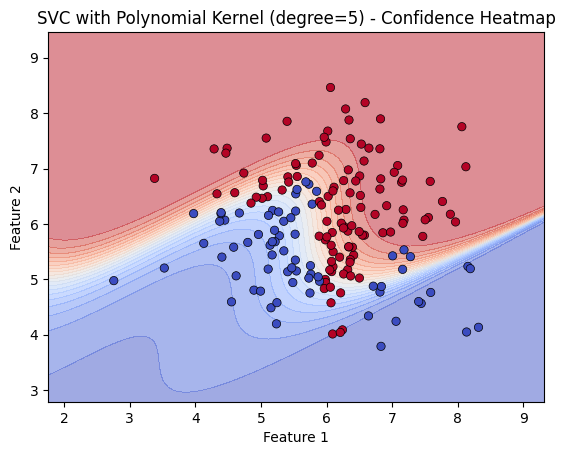

 Done with degree 5!



In [54]:
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

# fit SVCs with polynomial kernel of degree 1 to 5 and plot heatmaps
for degree in range(1, 6):  # degrees 1, 2, 3, 4, 5
    print(f"Fitting SVC with polynomial kernel (degree={degree})...")
    poly_svc = SVC(kernel='poly', degree=degree, probability=True)
    poly_svc.fit(X_train, y_train)
    
    # display the confidence heatmap
    disp = DecisionBoundaryDisplay.from_estimator(
        poly_svc, X_train,
        response_method="predict_proba",
        cmap=plt.cm.coolwarm,  
        alpha=0.5,  
        levels=20  
    )
 
    disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train,cmap=plt.cm.coolwarm, edgecolors='k', linewidth=0.5)
    plt.title(f"SVC with Polynomial Kernel (degree={degree}) - Confidence Heatmap")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    print(f" Done with degree {degree}!\n")


**Briefly describe what is happening.**

- **Degree 1**: Linear boundary (straight line) - same as linear kernel
- **Degree 2-3**: Smooth, curved boundaries that better fit the data
- **Degree 4-5**: Very complex, convoluted boundaries with many curves and pockets

Higher degrees allow the model to capture more complex patterns but may overfit the training data, creating boundaries that are too wiggly and may not generalize well to new data

**Finally, use an RBF kernel. This time, use a good protocol to obtain reasonably good performance with RBF kernel.**

Best hyperparameters: {'C': 100, 'gamma': 'scale'}
Best cross-validation score: 0.9750


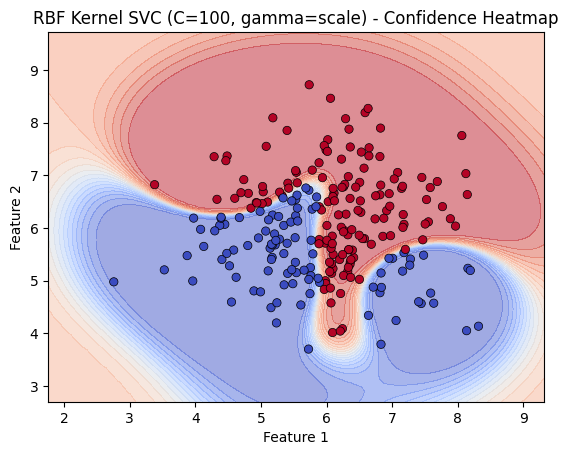

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay


# create the base SVC with RBF kernel
rbf_svc = SVC(kernel='rbf', probability=True)

# define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# grid search
grid_search_rbf = GridSearchCV(
    rbf_svc, 
    param_grid, 
    cv=5,  
    scoring='accuracy',
    n_jobs=-1  
)

# fit on the merged training+validation set
grid_search_rbf.fit(X_fold, y_fold)


print(f"Best hyperparameters: {grid_search_rbf.best_params_}")
print(f"Best cross-validation score: {grid_search_rbf.best_score_:.4f}")

# get the best model
best_rbf_svc = grid_search_rbf.best_estimator_

# display the confidence heatmap
disp = DecisionBoundaryDisplay.from_estimator(
    best_rbf_svc, X_fold,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm,  
    alpha=0.5,  
    levels=20  
)
# add the training points on top using a scatterplot
disp.ax_.scatter(X_fold[:, 0], X_fold[:, 1],c=y_fold, cmap=plt.cm.coolwarm,edgecolors='k', linewidth=0.5)
plt.title(f"RBF Kernel SVC (C={grid_search_rbf.best_params_['C']}, gamma={grid_search_rbf.best_params_['gamma']}) - Confidence Heatmap")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2' )
plt.show()
